In [17]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [18]:
N = nn.Sequential(nn.Linear(1,10), nn.Sigmoid(), nn.Linear(10,1, bias=False))
A = 1
Psi_t = lambda x: A + x * N(x)
f = lambda x, Psi: x**3 + 2*x + ((1+3*x**2)/(1+x+x**3))*x**2 - (x+(1+3*x**2)/(1+x+x**3))*Psi

In [19]:
def loss(x):
    x.requires_grad = True
    outputs = Psi_t(x)
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs), create_graph=True)[0]
    return torch.mean((Psi_t_x - f(x, outputs))**2)

In [20]:
optimizer = torch.optim.LBFGS(N.parameters())
x = torch.Tensor(np.linspace(0,1,10)[:,None])
x

tensor([[0.0000],
        [0.1111],
        [0.2222],
        [0.3333],
        [0.4444],
        [0.5556],
        [0.6667],
        [0.7778],
        [0.8889],
        [1.0000]])

In [21]:
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l

In [22]:
for i in range(10):
    optimizer.step(closure)

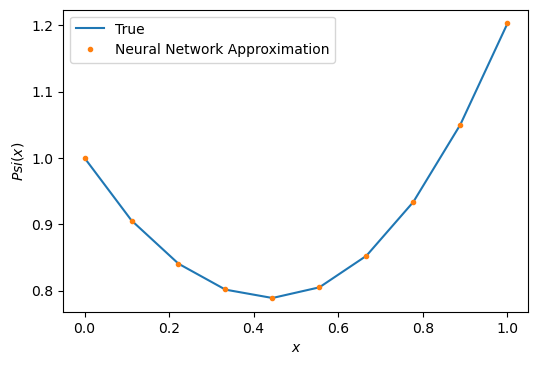

In [23]:
xx = np.linspace(0, 1, 10)[:,None]

with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()
yt = xx**2 + np.exp(-xx**2 / 2)/(1+xx+xx**3)

fig, axs = plt.subplots(dpi=100)
axs.plot(xx, yt, label="True")
axs.plot(xx, yy, ".", label="Neural Network Approximation")
axs.set_xlabel("$x$")
axs.set_ylabel("$Psi(x)$")
plt.legend(loc="best")

In [24]:
from sklearn.metrics import r2_score

score = r2_score(yt, yy)
score

0.9999916996638415

In [25]:
error = yt - yy
error

array([[ 0.00000000e+00],
       [ 2.42832946e-04],
       [ 2.38024572e-04],
       [-2.03299824e-04],
       [-5.98102802e-04],
       [-5.75114003e-04],
       [-2.17089685e-04],
       [ 1.77048780e-05],
       [-2.35868309e-04],
       [-6.07413280e-04]])

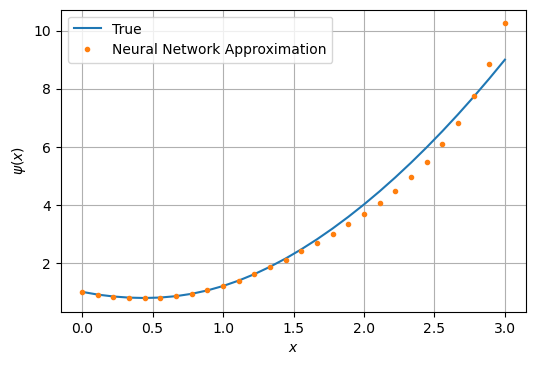

In [26]:
xxx = np.linspace(0,3,28)[:,None]
with torch.no_grad():
    yyy = Psi_t(torch.Tensor(xxx)).numpy()
yyt = xxx**2 + np.exp(-xxx**2 / 2)/(1+xxx+xxx**3)

fig, axs = plt.subplots(dpi=100)
axs.plot(xxx, yyt, label="True")
axs.plot(xxx, yyy, ".", label="Neural Network Approximation")
axs.set_xlabel("$x$")
axs.set_ylabel("$\psi(x)$")
plt.grid()
plt.legend(loc="best")

In [27]:
error = yyt - yyy
error

array([[ 0.00000000e+00],
       [ 2.42832946e-04],
       [ 2.38024572e-04],
       [-2.03299824e-04],
       [-5.98102802e-04],
       [-5.75114003e-04],
       [-2.17089685e-04],
       [ 1.77048780e-05],
       [-2.35987519e-04],
       [-6.07174861e-04],
       [ 4.44449931e-04],
       [ 5.57859281e-03],
       [ 1.80169990e-02],
       [ 4.07355309e-02],
       [ 7.57240857e-02],
       [ 1.23546009e-01],
       [ 1.83159605e-01],
       [ 2.51919188e-01],
       [ 3.25524662e-01],
       [ 3.97796091e-01],
       [ 4.60085115e-01],
       [ 5.00239767e-01],
       [ 5.01009763e-01],
       [ 4.37988695e-01],
       [ 2.77504985e-01],
       [-2.41239721e-02],
       [-5.17368529e-01],
       [-1.24855064e+00]])

In [28]:
score = r2_score(yyt, yyy)
score

0.9828883781340118

In [46]:
x = torch.Tensor(np.linspace(0,2,10)[:,None])
x

tensor([[0.0000],
        [0.2222],
        [0.4444],
        [0.6667],
        [0.8889],
        [1.1111],
        [1.3333],
        [1.5556],
        [1.7778],
        [2.0000]])

In [47]:
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l

In [48]:
for i in range(10):
    optimizer.step(closure)

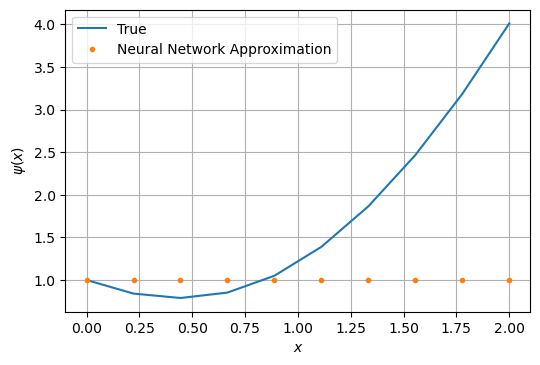

In [49]:
xx = np.linspace(0,2,10)[:,None]
with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()
yt = xx**2 + np.exp(-xx**2 / 2)/(1+xx+xx**3)

fig, axs = plt.subplots(dpi=100)
axs.plot(xx, yt, label="True")
axs.plot(xx, yy, ".", label="Neural Network Approximation")
axs.set_xlabel("$x$")
axs.set_ylabel("$\psi(x)$")
plt.grid()
plt.legend(loc="best")